In [64]:
# Linear Regression

# Regression: Statistical Techinque which helps us measure relationship between the independent varibales and a dependent variables
# LR falls under supervised ML category, here we work with labelled data with Y being continuous.
# Mean model is redundant model as it has errors associated with each data point.
# For mean model SST (Sum of Square of Total Error) = E(Y_actual - Y_mean)^2
# LR model has improvised by introducing best fit line thus reducing chance of errors.
# For LR model SST (Sum of Square of Error) = E(Y_actual - Y_predicted)^2
# NOTE: LR is a parametric method which is based on several assumptions like, no outliers, linearity, normality and no multi-collinearity, etc

# For using LR there are different approaches.
# 1. OLS Method (Ordinary Least Squares) - Statistical method where SSE is lowest
# 2. SGD Method ()Stochastic Gradient Descent) - ML - Deep learning method which is complex as the approach need to iterate through data several times

# We stick to OLS method in industry

# OLS Method
# Based of the fact that model uses best fit line that gives us the least SSE.
# OLS gives output as best fit line equation

# Types of linear regression
# 1. simple LR - one indendent varibale and one dependent varibale - For eg. predicting salary based on experience
# Equation: y = B0 + B1*X or y = m*x + c
# where B1 is slope co-efficient of X
# where Bo is Y-intercept

# B1 indicated that one unit changes in X is going to cause how many unit chnages in Y
# B1 could positive or negative value indicating the type of relationship between the variables
# B0 is is that point oon the Y-axis where the best fit line intersects the Y-axis
# B0 is a constant in equation, which is useful to predict Y where X is unknown, for eg. a fresher employee with 0 experience will get a basic salary

#2. Multiple LR - multiple independent varibale and one dependent varibale - For eg. predicting salary based on experience, domain, education, skills, etc
# Equation: y = B0 + B1*X1 + B2*X2 + B3*X3 + ..... + Bn*Xn
# Every independent variable will have different B value as every X will have different on Y.

# Training the model:
# Input: X and Y (historical) both are fed to model
# Output: Best Fit Line Equation [ y = B0 + B1*X1 + B2*X2 + B3*X3 + ..... + Bn*Xn ]

# Testing of model:
# Validation of model
# Input: Only X is fed
# Output: Y (predicted) based on best fit line equation

# Evaluation of the model:
# We use various evaluation matrices
# R^2, Adjusted R^2, RMSE, AIC/BIC

# Tuning of the model:
# 1. Feature selection
# 2. Regularization Techniques (Ridge, Lasso, ElasticNet)
# 3. SGD

In [65]:
# Imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import warnings 
warnings.filterwarnings("ignore")

In [66]:
ad_data = pd.read_csv(r"C:\Users\HP\Downloads\Advertising.csv", index_col = 0, header = 0)
ad_data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [67]:
print(ad_data.dtypes)
print()
print(ad_data.shape)
print()
print(ad_data.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

(200, 4)

               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


* count tell the no.of values present in the data, since there is 200 values means there is no missing values. 
* mean represents the average investment done on each medium and the sales is increasing by the average of 14k$ everyyear.
* checking the outliers: for lower end--> the diff between min and 25% is less than std means there is no outliers and same for higher end---> the diff between max and 75% is less compared to std tat means there is no outliers. 
* Here if see in newspapper there are outliers at the higher end in the data because the diff between max and 75% is huge as compared to std.


In [68]:
# To check null values in the data
ad_data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

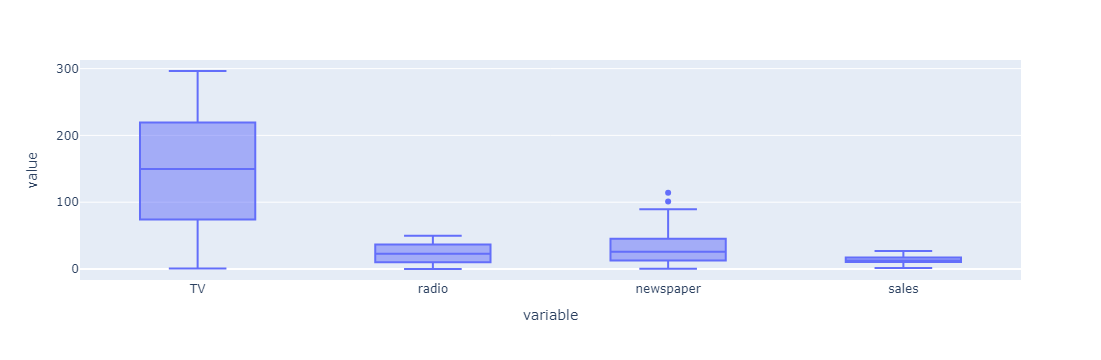

In [69]:
# Suspecting of lower and upper outliers with the help of boxplots
# For any X the outlier suspecion will be.
# Lower outlier = value at 25% - 
# Upper outlier = value at 75% -

ad_data_box = px.box(data_frame = ad_data)
ad_data_box.show()

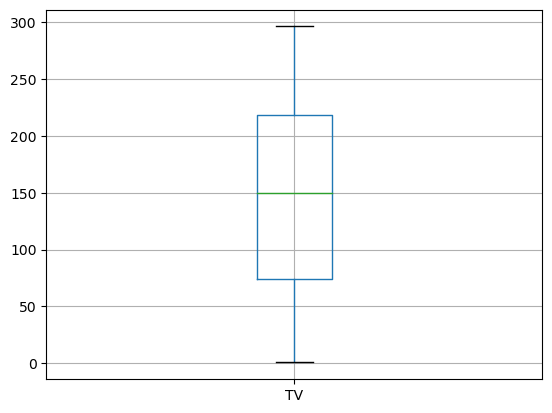

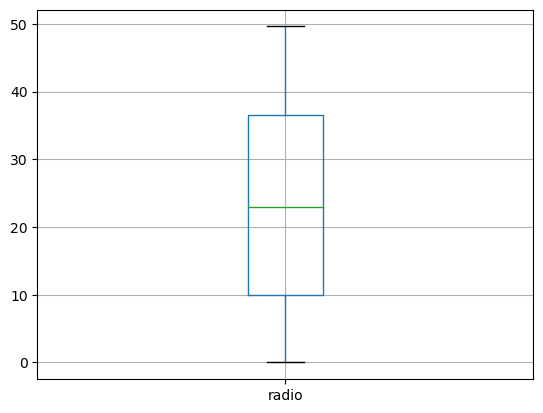

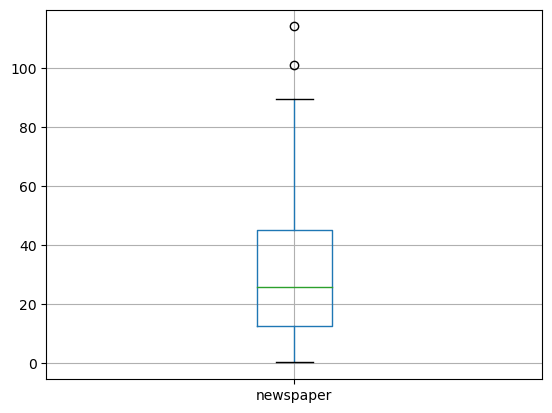

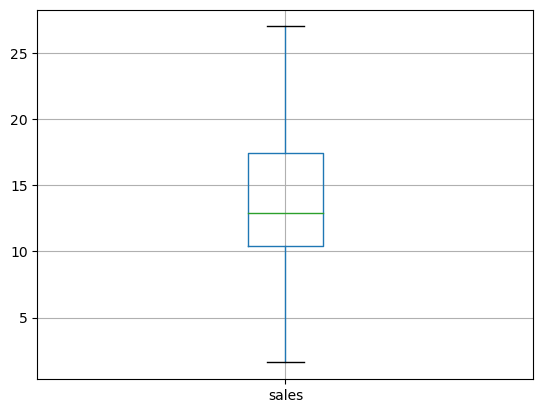

In [70]:
# Assumption 1: There should be no outliers in data
# Check box plot
for i in ad_data.columns:
    ad_data.boxplot(column = i)
    plt.show()

# Using plotly
# for i in ad_data.columns:
#    ad_data_box = px.box(data_frame = ad_data, y = i)
#    ad_data_box.show()

* here in newsapaper if we see the outliers are ot far from the accepatable range hence there could be chance that in those particular month the investion done is high, They might be a true outliers hence we are keeping them untouched. 
  
##### for later stage
* We can see two outliers in newspaper, we will eliminate the two ouliers and proceed  
  #data.drop(data[data["newspaper"] >= 90].index, axis = 0, inplace = True)

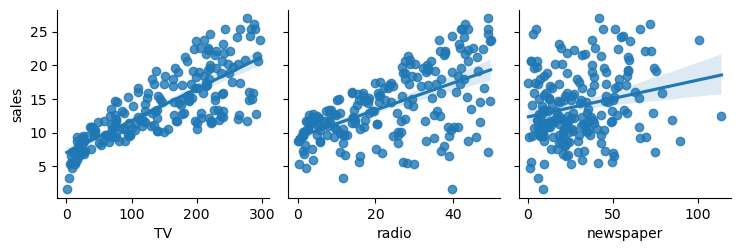

In [71]:
# Assumption 2: Assumption of linearity, every indpendent varibale should have a linear relationship with dependent variable

sns.pairplot(ad_data, x_vars = ["TV", "radio", "newspaper"], y_vars = ["sales"], kind = "reg")
plt.show()

# scatter plt ---> use to relationship between 2 continuous variables. we cannot get check it on categorical variable.
# kind= reg ---> tp get the line 
# we can also write kind =scatter to get the points
# this is how we can check the linearity if we have too many variables by passing the variables accordingly.
#data.column[0:-1]

* Tv ---> we can say that there is a high positive relation between tv and sales.
* radio--> there is slightly moderate relation between the sales and radio as the points below the line are scattered and the points above the line are showing a positive relation. 
* newspaper---> all the data points are scattered hence it is showing no relation(no matter how much investment we we do still the sales will remain same)
. hence we can eliminate that variable which doesnt meet the assumption but befor that we need to check if the very is significant or not.
* NOTE: when the variable does not meet the assumption of linearity but is imp variable then we would switch the algo.

In [72]:
# data.drop(["newspaper"], axis = 1, inplace = True)

In [73]:
ad_data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [74]:
# Create X and Y - independent and dependent
X = ad_data[["TV", "radio", "newspaper"]]
Y = ad_data[["sales"]]

# if there are multiple variables 
#X=data.iloc[:,0:-1] ---> consider all the values in rows and consider only columns till -2

In [75]:
print(X.shape)
print()
print(Y.shape)

(200, 3)

(200, 1)


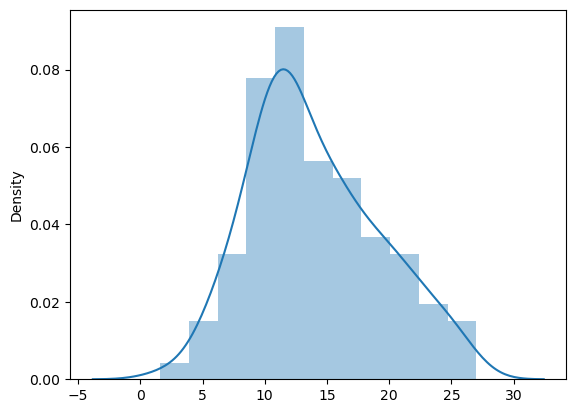

In [76]:
# Assumption of Normality: The dependent variable should follow an approximate normal distribution
#sns.displot(Y, kde = True)    #in new version displot doesnt show curve so for that we write this code)
#plt.show()

sns.distplot(Y)
plt.show()

* sales variabes is showing an approx normal distribution. 

In [77]:
# Log and SQRT transformation can reduce skewness of the data
# Log transformation smoothens out the peaks
# Log transformation are preferred over SQRT transformation because it would reduce the value but still show the peak and in logtrans it smoothens how the peak and makes it bell shape

In [78]:
"""# Log Transformation code:
import numpy as np
Y_log = np.log(Y)     # if error comes in 
"""


'# Log Transformation code:\nimport numpy as np\nY_log = np.log(Y)\n'

NOTE: 
* Ahead we will always use Y_log values and not Y values
* if the data meets the assumption we will not use log transformation.
* Log transformation can bring skewness if we apply log transformation on normal distributed data.


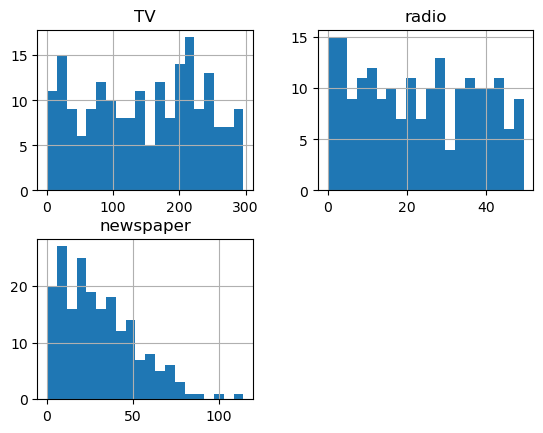

In [79]:
X.hist(bins = 20) # dividing the data into 20 bins
plt.show()

# on y axis its the frequency count, height of bin will tell how many observations fall into that particular range(freq count)
#lets say if there is 100 to 110 bin then we can say total 8 observations are falling into that partiular bin.


* We are trying to check the skweness in the x variable though it is not an assumption but a good practice. 
* This will help to handle skweness in the independent variables. 
* Concusion: We can see Newspaper has right-skewness as the value is tailing towards positive side.

In [80]:
# To log tarnsform only those independent variable X which has skewness

from scipy.stats import skew 

# finding the skewness in each variable
data_num_skew = X.apply(lambda i : skew(i.dropna())) 
# X.apply means the logic that im applying here needs to be applied to each an every variable of x.
# lambda functions is used to create annoynmous funct---> it will create a temporary function and later delete it from the memory

# Subsetting the varibale that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > 0.75) | (data_num_skew < -0.75)]

print(data_num_skew)
print(data_num_skewed)

# import numpy as np

# Apply log + 1 transformation for all numeric features with skewness over 0.75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index]) #  generic code 
# X["newspaper"] = np.log1p(X["newspaper"]) 


# if there is 0 value in X variable then take log1p (adds 1 then takes log) because if take log of 0 it will return - infinity
# - infinity is not a numeric value and ideally we cant build model on infinite values.
# to be on safer side we use log1 tranformation.
# Note: log transformation or log1p transformation needs to be excute only once.

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


* if the value is close to 0 there is less or no skweness value in the data and value close to 1 and -1 then it is highly skwed nature.
* Here if we see tv skweness value is close to zero means there is no skweness in the data, same with radio the value is close to 0 . 
* but if we observe in newspaper the skweness value is very close to 1 ( highly positive skweness). hence we can say that there is skweness and same was observed in the above graph as wel.

In [81]:
X
# here if we see the newspaper has stored the log1p values.


,TV,radio,newspaper
1,230.1,37.8,4.251348
2,44.5,39.3,3.830813
3,17.2,45.9,4.252772
4,151.5,41.3,4.085976
5,180.8,10.8,4.084294
...,...,...,...
196,38.2,3.7,2.694627
197,94.2,4.9,2.208274
198,177.0,9.3,2.001480
199,283.6,42.0,4.207673


In [ ]:
# terminalogys to remember realted to model
#  Y--X
#  Log-log --> it means we have applied log transformation on y variable and something in x variable as transformed
#  log-level ---> means we have applied log transformation on y variable and on x there is not log transformation.
#  level- log ---> no log transformation on Y and but on x
#  level-level--->no log transformation on any variable.

# here we are trying to build level--log model.


                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


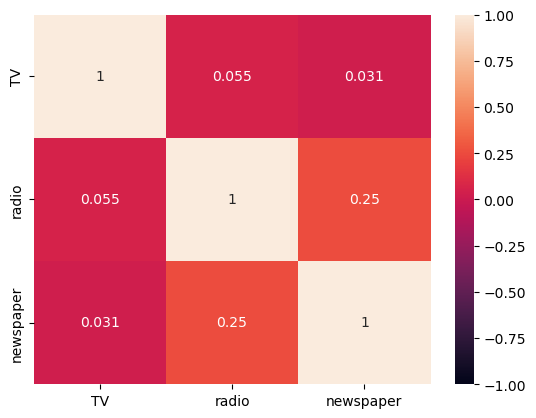

In [82]:
# Assumption of NO multi-collinearity: There should should be no multi-collinearity between the independent variables
# example: lets say i a data set where i have monthly salary and annual salary, these two independent variable 
#          will show multi collinearity because if monthly salary increases the annual salary will aslo increase

# multi-collinearity means relationship amongst the multiple independent variables 
#2 approaches to check multi collinearity
#        * simple approach( correlation matrix): where it will allows us to check corealtion between 2 variables
#                           and then later we can eliminate any one variable from it.
#        * VIF: variance inflation factor


corr_df = X.corr(method = "pearson") # it will create df and store the relationship values between each variable
print(corr_df)

sns.heatmap(corr_df, vmax = 1.0, vmin = -1.0, annot = True)
# here vmax and vmin is to pass the colours for the range 1 to -1 and annot= true is for printing the values on the heatmaps.

plt.show()


Heatmaps : The colors in the heatmap represent the correlation between the ind variables, which typically range from -1 to 1.
* 1 indicates a perfect positive correlation. if 1 x variable value increase then 1 y variable value will also increase
* -1 indicates a perfect negative correlation. if 1 x variable value increase then 1 y variable value will also decrease
* 0 indicates no correlation. 

* The gradient or intensity of the colors helps to quickly identify the strength and direction of correlations.

How to read the heatmap: 
* daigonally if we see its showing 1 because variable relation with itsellf will always be hight positive correlation.
* the relation between radio and tv is showing 0.055 means the value is close to 0 and hence the variable are independent of each other.
* similarly, the relation of newspaer with tv is gain close to 0 hence the variable are independent of each other.
* similary we can check for the rest of them as well.   
  
  
Hence we can conclude that there is no collinearity among the variable each variable are independent of each other.  
  
  
Note: if i see high corelation in any of the variable then i would simply remove one variable basis of their importance/ significance. 


In [83]:
# VIF [Variance Inflation Factor]
# VIF = 1 / (1 - R^2) It returns the r^2 value as the output
# It will go through the number of iterations, the number of iterations depend on number of X

# Minumum VIF is 1 and acceptable VIF is less than 5 or 10.
# if my r^2 value is high VIF value also be high which is not the ideal senario.
# We always eliminate that variable with highest VIF value and re-run the VIF function on the remaining variable
#          this will change the VIF values for the variable then again delete the highest VIF value and so on.        
#         ... keep the process continuing till we get a full ranked matrix, all the variables will have VIF< 5.
#           hence i have reach the case where i can keep the var and build a model on it.

# Note: here keep in mind that full ranked matrix should not be the main goal becoz we will end up losing the variable 
#       and hence wont be able to justify the model to the client.

# if VIF is < 5, keep the variables
# if VIF > 5, try to eliminate the variables. 

# note: eliminate the VIF value one by one and all together depending upon its importance.
# Example: lets say house prediction model, where i have High VIF value for sqft area so in this case ill not delete 
#          the variable because it holds significance value in the data 
#          bcoz on the basis of sqft area ill predict the selling price of the house. tho it is giving good r^2 value. 

# For example:
# 1st iteration:
# TV - dependent variable
# Radio & Newspaper - independent variable 
# Suppose  R^2 = 0.2, thus VIF will be low.

# 2nd iteration:
# Radio - dependent variable
# TV & Newspaper - independent variable 
# Suppose  R^2 = 0.8, thus VIF will be high.

# 3rd iteration:
# Newspaper - dependent variable
# TV & Radio - independent variable 
# Suppose  R^2 = 0.1, thus VIF will be low.

# if my r^2 value is high VIF value also be high which is not the ideal senario.


In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame() # creating empt df
vif_df["features"] = X.columns # where im creating a col name(features) in vif_df where i'm going to store the x.var values as obs
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])] # i will point to number of columns saying number of iterations
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [111]:
X.shape[1] 

3

In [113]:
list(range(X.shape[1]))

[0, 1, 2]

In [85]:
#X.drop("newspaper",axis=1,inplace=True) 
#rerun the VIF code
# drop the variable with highest VIF value which shows multi-collinearity in data.

In [86]:
from sklearn.model_selection import train_test_split


# Split the data into test and train---> where it will do randomly split the data
# we will try building model on training data and then predict the model on the testing data.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10) 
# this code is used when we have been given single data file. 
# left side code should be in same format all we have to change is test_size.


# NOTE: test_size indicates what is the ratio we want to split the data. 
#    if the data > 1000 ----> we follow 70-30 ratio where 70 will go in training data and 30 in testing 
#   if the data < 1000----> 80-20 ratio because if the data is very less in traing then my model will be underfitted. 
#    default value for test_size is 0.25 where 75 in train and 25 in test. 

In [121]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print("Percentage of train",X_train.shape[0]/X.shape[0]*100)
print("Percentage of test",X_test.shape[0]/X.shape[0]*100)
print("Percentage of train",Y_train.shape[0]/X.shape[0]*100)
print("Percentage of test",Y_test.shape[0]/X.shape[0]*100)

(160, 3)
(160, 1)
(40, 3)
(40, 1)
Percentage of train 80.0
Percentage of test 20.0
Percentage of train 80.0
Percentage of test 20.0


In [127]:
from sklearn.linear_model import LinearRegression

#create a model object
lm = LinearRegression()

# train the model object
lm.fit(X_train, Y_train) 
# so here im telling the lm objects that if these are the investment done on the x var over period of month then 
#    this is the increase in the sales.
# so 160 obs have gone into the training data that ill pass in the fit function such that the LR will learn the model and give us the best fit line eq. 


# once the model is build it will assosicate with some parameter 

# print intercept and coefficients---> (parameters)
print(lm.intercept_ # it will give B0 value which indicate if one unit change in x then how many unit change in y 
print(lm.coef_) # it will give slope coefficient value.

[3.35329139]
[[ 0.0437425   0.19303708 -0.04895137]]


Conclusion: By investing 1000 dollars into TV ads, we can see a increase of 0.04 dollars in the sales. Given in Problem Statment that numbers are 1000 of dollars. by investing 1000 dollars in radio ads, we can see a increase of 0.19 dollars in the sales. if 1000 dollars is invested in the newspaper the sales is drecasing by 0.048 dollars  .  
  
Hence we can conclude over here is that investing in tv and radio is actually increasing the sale nut investing in radio the sales drastically decreasing(-ve relation). Also investing in radio, the sales is drasticalling increasing.  
So here i can tell the client to stop making investment in newspapers because it is not a profitable aaproach.

In [125]:
# pair the feature names with the coefficients 
print(list(zip(X.columns, lm.coef_.ravel())))

# ravel() in np will help me to convert 2 demensions array into single demensional array

[('TV', 0.04374250157742164), ('radio', 0.19303707897345296), ('newspaper', -0.04895136822248787)]


In [120]:
# Manually predicting the y value.
tv = 100
radio = 200
newspaper = np.log1p(0) # we log tansformed newspaper variable

Y_pred = 3.3532913858151474 + (0.04374250157742166 * tv) + (0.1930370789734531 * radio) + (-0.04895136822248787 * newspaper)
print(Y_pred)

46.33495733824793


In [91]:
# predict using the models
Y_pred = lm.predict(X_test) # validation testing data. 
print(Y_pred)

# storing all the predicting values in Y_pred

[[18.15026866]
 [12.96136899]
 [18.05815332]
 [23.66025079]
 [20.68751041]
 [14.26325872]
 [14.92774472]
 [21.38847375]
 [21.14752911]
 [12.75788534]
 [23.99735583]
 [ 7.20632737]
 [12.30777109]
 [19.22813333]
 [19.41581583]
 [13.44985803]
 [19.62619644]
 [ 9.24667496]
 [21.1052867 ]
 [20.87838433]
 [15.52611251]
 [10.91695579]
 [22.82910679]
 [15.82915597]
 [17.40742204]
 [ 8.17170435]
 [11.88738387]
 [12.69866637]
 [21.71275044]
 [ 7.94920205]
 [12.49118989]
 [20.43292079]
 [ 4.71443086]
 [ 4.72126238]
 [16.7504848 ]
 [15.74384945]
 [ 6.74775596]
 [17.73750244]
 [ 9.01170001]
 [13.60841593]]


NOTE: The reason why we dont use traing data to predict the value is because my model have already learn the data and knows the values while building the model and hence it will give good results only is not ideally correct.  
Therefore, we pass unseen test data for validation to check if my model is performing well or not. 

In [92]:
new_df = pd.DataFrame()
new_df = X_test.copy()

new_df["Actual sales"] = Y_test # passing all the Y_test value in actual values
new_df["Predicted sales"] = Y_pred  # passing all the Y_pred in the predicted values.

new_df = new_df.reset_index().drop("index", axis = 1)
new_df

,TV,radio,newspaper,Actual sales,Predicted sales
0,210.7,29.5,2.332144,18.4,18.150269
1,8.7,48.9,4.330733,7.2,12.961369
2,218.4,27.7,3.996364,18.0,18.058153
3,283.6,42.0,4.207673,25.5,23.660251
4,216.4,41.7,3.703768,22.6,20.687510
5,147.3,23.9,3.000720,14.6,14.263259
6,188.4,18.1,3.280911,14.9,14.927745
7,198.9,49.4,4.110874,23.7,21.388474
8,216.8,43.9,3.339322,22.3,21.147529
9,17.2,45.9,4.252772,9.3,12.757885


We can observe that the predicted values are pretty close to the actual value but in some case model has not predicted the correct value where the actual value is pretty low and predicted value is high.

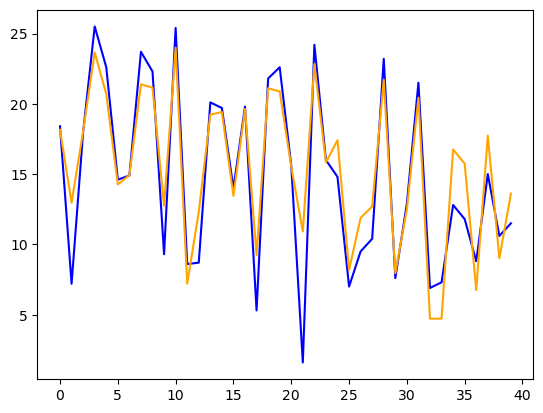

In [93]:
new_df["Actual sales"].plot(color = "blue")
new_df["Predicted sales"].plot(color = "orange")
plt.show()

In [94]:
# Evalution Metrics
# R^2, Adjusted R^2, RMSE, AIC/BIC

# 1. R^2 - R-Squared - Coefficient of Determination
# Formula - R^2 = 1 - [(SSE)/(SST)] 
# where SSE - regression model error
#       SST - mean model error
# Definiation: R-squared indicates the amount of variability in Y that can be explained on the basis of all the X variables in the data, it indirectly
# helps us identify how better is our regression model in comparison to mean model.
# Ideally, R^2 value is 0 and 1.
# R^2 = 1 or close to 1, means good model (much better than mean model)
# R^2 = 0.5 or close to 0.5, means model requires tuining
# R^2 = 0 or close to 0, means poor model (change the algorithm / equivalent to mean model)
# In rare case, R^2 is less than 0, discard the model (mean model better than regression model)

# 2. Adjusted R^2 - Adjusted R-Squared
# Main drawback of R^2: It keeps on increasing as we add more predictor varibales (X) in the data, irrespective of whether they are significant or not,
# hence we make use of Adjusted R^2 which is a modified peanlised version of R^2 and is adjusted based on the significant predictors in the model, so it 
# increases only if significant varibales are added to the data.
# Adjusted R^2 is always lower than the R^2 and is preferred metric used to quote the performance of the model since it is more relaible.
# Formula - Adjusted R^2 = 1 - [(1 - R^2)(n - 1) / (n - p - 1)]
# where n is no. of observations
#       p is no. of predictors
# If R^2 = 0.88, Adjusted R^2 = 0.877/0.886, ideal scenario
# If R^2 = 0.88, Adjusted R^2 = 0.82/0.81, model requires tuining
# IF R^2 = 0.4, Adjusted R^2 = 0.39, model requires tuining
# Definiation: 

# 3. RMSE (Root Mean Square Error)
# Formula RMSE = {[E(Y_actual - Y_predicted)^2] / n}^0.5
# There is no range for RMSE, ideally it should be low.
# Depends on range of Y_actual variable.
# RMSE is used to compare the model with different algorithms but same data.
# Model with least RMSE is the best model.

# 4. AIC/BIC (Akaike Information Citeria)/(Base Information Citeria)
# AIC is preferred
# This method is preferred of Time Series models
# Used to compare models where the algorithm remains the same but the data/parameters change.
# For example:
# Lin Reg - 15 Independent variables - AIC = 582.15
# Lin Reg - 11 Independent variables - AIC = 601.27
# Lin Reg - 13 Independent variables - AIC = 550.72
# Model with least AIC is the best model.

In [95]:
from sklearn.metrics import r2_score,mean_squared_error
# metrics is a liabrary which stores all the valuation metrics realted function.
import numpy as np
 
r2 = r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1 - r2) * (len(Y) -1 )/(len(Y) - X.shape[1] - 1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348010719035319
RMSE: 2.5929769110930603
Adj R-square: 0.8322725168816472


In [96]:
print(Y_test.min()) # we always check RMSE with the range of Y_test var. 
print(Y_test.max())

sales    1.6
dtype: float64
sales    25.5
dtype: float64


* Since R-squared is close to 1, Adj R-square is almost close to R-squared and RMSE is less (w.r.t range of Y_actual).
* Hence the model we built is a good model.
* here we can say that tho newspaper varibles was not fulfilling the assumptions still it is not impacting the model in bad way.  
  
NOTE: when the clients provides more testing data then we only use the predict function( because my model is already built) will be running to find the predictions and hand it over to the client.

In [98]:
lm.score(X_train, Y_train)
# Y_pred = lm.predict(X_train)
# score = r2_score(Y_train, Y_pred)

0.920898664750022

the score method typically returns the 𝑅2. R2 score, which is the coefficient of determination. It indicates how well the model's predictions approximate the actual data points.

In [99]:
new_df["Residual"] = new_df["Actual sales"] - new_df["Predicted sales"] 
# REsidual --> is the diff between actual and predicted value.

# saving all the data into excel file.
new_df.to_excel("Sales Predicition.xlsx", header = True, index = True)
new_df.head()

,TV,radio,newspaper,Actual sales,Predicted sales,Residual
0,210.7,29.5,2.332144,18.4,18.150269,0.249731
1,8.7,48.9,4.330733,7.2,12.961369,-5.761369
2,218.4,27.7,3.996364,18.0,18.058153,-0.058153
3,283.6,42.0,4.207673,25.5,23.660251,1.839749
4,216.4,41.7,3.703768,22.6,20.687510,1.912490


In [100]:
# Tuning of the model:
# 1. Feature selection: element the var on the basis of domain knowledge
# 2. Regularization Techniques (Ridge, LASSO, ElasticNet)
# 3. SGD

# 2. Regularization Techniques (Ridge, Lasso, ElasticNet)
# A. Ridge - L2 penalty
# It performs Linear Regressions and helps us identify insignificant independent varibales in model and reduces their beta parameters values such that
# the overall impact of these insignificant variables on the model is reduced.
# Ridge is preferred when we have less no. of independent varibales and do want to lose any of them.
# LR - y = B0 + B1*X1 + B2*X2 + B3*X3 + B4*X4
# Suppose X2 and X4 are the insignificant variables (depending on the p-values) then it will adjust the B2 and B4 values so that overall impact of these 
# insignificant variables on the model is reduced.

# B. LASSO - L1 penalty
# LASSO - Least Absolute Shrinkage & Selection Operator
# It performs Linear Regressions and helps us identify insignificant independent varibales in model and forces the beta parameters values to be zero
# such that the overall impact of these insignificant variables on the model is eliminated.
# LASSO is preferred when we have large no. of independent variables and we do not mind losing few of them.
# LR - y = B0 + B1*X1 + B2*X2 + B3*X3 + B4*X4
# Suppose X2 and X4 are the insignificant variables (depending on the p-values) then it will make the B2 and B4 values zero that overall impact of these 
# insignificant variables on the model is eliminated.

# ElasticNet
# Mix of Ridge and LASSO
# ElasticNet allows us to combine the effect of Ridge and LASSO into a single model, it is preferred where we are not sure whether to 
# use Ridge or LASSO.
# The l1_ratio can be a value between 0 and 1, which indicates the percentage impact of LASSO on the model.
# For example: if L1_ratio is 0.4 then it will act 40% like LASSO and 60% like Ridge
# The default value is 0.5, which gives equal mix of Ridge and LASSO.

In [101]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train, Y_train)

"""
previous values:
3.3532913858151474
[ 0.0437425   0.19303708 -0.04895137]
"""

# print intercept and coefficients
print(rid.intercept_)
print(rid.coef_)

[3.35224717]
[[ 0.04374234  0.19302603 -0.04853131]]


In [102]:
Y_pred = rid.predict(X_test)
print(Y_pred)

[[18.14984366]
 [12.961602  ]
 [18.05844603]
 [23.66046356]
 [20.68752578]
 [14.26318679]
 [14.9278479 ]
 [21.38857787]
 [21.14736702]
 [12.75811738]
 [23.99745819]
 [ 7.20656373]
 [12.30813313]
 [19.22822402]
 [19.41619189]
 [13.44941112]
 [19.62559951]
 [ 9.24628306]
 [21.1051215 ]
 [20.87807898]
 [15.52579217]
 [10.91642817]
 [22.82923662]
 [15.82939321]
 [17.40752649]
 [ 8.17207209]
 [11.88688403]
 [12.69878967]
 [21.71245614]
 [ 7.94914659]
 [12.49142141]
 [20.43289143]
 [ 4.71465713]
 [ 4.7216782 ]
 [16.75029355]
 [15.74408175]
 [ 6.74767421]
 [17.73713545]
 [ 9.01204512]
 [13.60840942]]


In [103]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2 = r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1 - r2) * (len(Y) -1 )/(len(Y) - X.shape[1] - 1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348082644975935
RMSE: 2.5929204626839977
Adj R-square: 0.8322798195664342


In [104]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train, Y_train)

"""
previous values:
3.3532913858151474
[ 0.0437425   0.19303708 -0.04895137]
"""

# print intercept and coefficients
print(las.intercept_)
print(las.coef_)

[3.33679406]
[ 0.04362374  0.18766033 -0.        ]


In [105]:
Y_pred = las.predict(X_test)
print(Y_pred)

[18.06429565 12.89291061 18.06240985 23.59022036 20.60240696 14.24765273
 14.95215852 21.28397604 21.03270918 12.70073142 23.91262327  7.30875314
 12.27479157 19.18615151 19.40987087 13.37169781 19.52635995  9.18340605
 21.01174436 20.74314144 15.48896526 10.79867965 22.74877319 15.78495133
 17.45553519  8.22914947 11.77231457 12.65310134 21.59003277  7.96379194
 12.53499059 20.35780103  4.83670342  4.8659235  16.78762249 15.83910155
  6.83541797 17.72822269  9.10768074 13.67675885]


In [106]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2 = r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1 - r2) * (len(Y) -1 )/(len(Y) - X.shape[1] - 1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292


* Earlier R-squared: 0.8348010719035319  
          RMSE: 2.5929769110930603  
          Adj R-square: 0.8322725168816472  
* Here i can state that the model have slightly improve as compared to the earlier model after tuning.

In [107]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(l1_ratio = 0.3) #  30% like LASSO and 70% Ridge
en.fit(X_train, Y_train)

"""
previous values:
3.3532913858151474
[ 0.0437425   0.19303708 -0.04895137]
"""

# print intercept and coefficients
print(en.intercept_)
print(en.coef_)

[3.26677821]
[ 0.04369425  0.19035493 -0.        ]


so here the lasso has interpreted the insignificant variable and consider it as 0, hence the model will now only consider tv and newspaper variable.

In [108]:
Y_pred = en.predict(X_test)
print(Y_pred)

[18.08862678 12.95527437 18.08243361 23.65337411 20.66001417 14.25242383
 14.94419881 21.36109781 21.09627272 12.75561068 23.97701551  7.25902661
 12.32372155 19.22114366 19.44307245 13.38868348 19.54683684  9.19433963
 21.06116539 20.80910651 15.48904706 10.83541951 22.81224084 15.83214173
 17.43249132  8.21893211 11.80919333 12.69212109 21.64875801  7.94931961
 12.52384143 20.40544771  4.77293792  4.8019661  16.74915133 15.79479298
  6.7710569  17.7068152   9.07066609 13.63158574]


In [109]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2 = r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1 - r2) * (len(Y) -1 )/(len(Y) - X.shape[1] - 1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8358044992886291
RMSE: 2.5850899741654314
Adj R-square: 0.8332913028491693


##### Conclusion:
* We can state that out of all the model i.e linear regressiuon model, rigde model, and lasso. Lasso is performing comparetively with other model well with good accuracy score. 

#### Evalutaing the model on basis of stats model

In [ ]:
# OLS - OLS(Y_train, X_train)
# ols - ols(Y ~ X1 + X2 + X3)

In [ ]:
# fit(X_train, Y_train) -- sklearn
# Y ~ X1 + X2 + X3, data = DF -- statsmodel

In [130]:
new_df = pd.DataFrame()
new_df = X_train.copy()

new_df["sales"] = Y_train.copy()
new_df.shape

(160, 4)

In [131]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula = 'sales ~ TV + radio + newspaper', data = new_df).fit()
 
# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           1.10e-85
Time:                        18:15:59   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

The output you've provided is the result of an Ordinary Least Squares (OLS) regression analysis. Here's a detailed breakdown of what each part of the output means wrt to LR:

* R-squared (0.921): The model explains 92.1% of the variance in sales, which indicates a very good fit. This means that the majority of the variation in sales can be explained by the variation in TV, radio, and newspaper advertising expenditures.
* Adjusted R-squared (0.919): Adjusted for the number of predictors in the model, it is very close to the R-squared value, further indicating a strong model fit.  hence we can say that here the r^2 is close 1 and the adjusted r^2 is almost close to r_sq hence we can say that it is a good model. but on the train data
   
      
* Intercept (3.3533): The intercept is statistically significant (p-value = 0.000). This means that when all predictors are zero, the baseline sales are approximately 3.353 units.
* TV (0.0437): The coefficient for TV advertising is positive and statistically significant (p-value = 0.000). This suggests that for each additional unit spent on TV advertising, sales increase by 0.0437 units, holding other factors constant.
* Radio (0.1930): The coefficient for radio advertising is also positive and statistically significant (p-value = 0.000). This indicates that for each additional unit spent on radio advertising, sales increase by 0.1930 units, holding other factors constant.
* Newspaper (-0.0490): The coefficient for newspaper advertising is negative but not statistically significant (p-value = 0.697). This implies that, within this model, newspaper advertising does not have a significant impact on sales when TV and radio expenditures are considered.

* if check p-values Hypothesis 
Ho - There is no significant relationship between X and Y variables  
H1 - There is a significant relationship between X and Y variables  
p<0.05  
if p-value is low the null must go (rejects Ho)  
if p-values is high, the null must fly (fail to reject Ho)
Here newspaper p-values is greater than 0.5 means it rejects the null hypo which means newspaper has no significant relation with y ( sales) variable. hence we can remove the variable and try building the model again.
* durbin watson ( check autocorrelation): since the 2.106 is close to 2 hence the variables have no auto correlation in the data. Note: if we get value close to 0 or 4 then ideally we have done LR on time series model data.

In [132]:
# Hypothesis on LR
# Ho - There is no significant relationship between X and Y variables
# H1 - There is a significant relationship between X and Y variables
# p<0.05
# if p-value is low the null must go (rejects Ho)
#if p-values is high, the null must fly (fail to reject Ho)

# Durbin - Watson Test:
# Used to check whether there is auto-correlation or not in data 
# Auto co relation means relationship/dependency between observation in a variable
# eg: yesterdays observation have an impact on todays observation
# Note: there will be no auto correlation between the values in the regression problem 
#       because there is relation between variable and not the obs. this would ideally work for time series modelling 
#         Eg:In predicting house prices, the selling price of a house depends on various independent variables such 
#         as sqft area, number of bedrooms, etc. The selling price does not depend on individual observations. 
#         For example, if Mr. A sells his house for 43 lakhs, this does not directly influence the price at which Mr. B 
#         sells his house. Instead, the selling price for Mr. B's house will depend on the characteristics of his house, 
#         such as its size, number of bedrooms, location, and other relevant factors 
#         This statement clearly explains that house prices are determined by their features rather than the prices 
#         at which other houses were sold.
# It has value 0 to 4
# If the value is close to 2 - no auto -correlation
# If the value is close to 4 - negative auto-correlation
# vaue close to 0 ---> +ve autocorrelation
# value close to 4---> -ve autocorrelation.

In [133]:
# now we will try to predict on test data.
Y_pred_new = lm_model.predict(X_test)
print(Y_pred_new)

60     18.150269
6      12.961369
21     18.058153
199    23.660251
53     20.687510
20     14.263259
163    14.927745
56     21.388474
70     21.147529
3      12.757885
99     23.997356
11      7.206327
76     12.307771
143    19.228133
125    19.415816
64     13.449858
110    19.626196
79      9.246675
112    21.105287
186    20.878384
155    15.526113
131    10.916956
62     22.829107
88     15.829156
103    17.407422
122     8.171704
137    11.887384
2      12.698666
48     21.712750
173     7.949202
160    12.491190
40     20.432921
77      4.714431
92      4.721262
36     16.750485
179    15.743849
128     6.747756
170    17.737502
47      9.011700
175    13.608416
dtype: float64


In [134]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2 = r2_score(Y_test, Y_pred_new)
print("R-squared:", r2)
 
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_new))
print("RMSE:", rmse)
 
adjusted_r_squared = 1 - (1 - r2) * (len(Y) -1 )/(len(Y) - X.shape[1] - 1)
print("Adj R-square:", adjusted_r_squared)

R-squared: 0.8348010719035377
RMSE: 2.592976911093015
Adj R-square: 0.832272516881653


In [135]:
import statsmodels.formula.api as sm
 
# create a fitted model with only 2 variable ( not including the newspaper variable.) features
lm_model = sm.ols(formula = 'sales ~ TV + radio', data = new_df).fit()
 
# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           3.47e-87
Time:                        22:38:56   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

* The intercept value, tv and radio values has slightly change because i have not included newspaper variable. 
* if we observe the R^2 value in the above model is also same as this modell i.e 0.921. which means tho news paper was not a significant variable but it didnt had a bad impact on the model. that is why the R^2 value as not change.
* but if we see adjusted r^2 value has improved compared to previous  adj r^2 which means building a model with only significant variable tv and radio the adjusted r^2 has increase moving close to r^2. 
* Since the r^2 and adj r^2 value is close means it is a good model than previous.
* AIC value has also reduce compared to previous model.  it is the  least AIC value till now hence it indicates that it is good model.
* durbin -watson values as move more closer to zero means there is no auto correlation in the data.

In [136]:
Y_pred_new = lm_model.predict(X_test)
print(Y_pred_new)

60     18.105496
6      13.006964
21     18.095780
199    23.698040
53     20.702285
20     14.256028
163    14.936884
56     21.418844
70     21.143108
3      12.801316
99     24.022463
11      7.223024
76     12.364865
143    19.245930
125    19.466233
64     13.402908
110    19.559504
79      9.206617
112    21.096446
186    20.858114
155    15.487925
131    10.867649
62     22.857767
88     15.869345
103    17.411041
122     8.214591
137    11.840839
2      12.724886
48     21.691235
173     7.941688
160    12.515650
40     20.439746
77      4.727223
92      4.756074
36     16.715560
179    15.757106
128     6.723422
170    17.686508
47      9.043773
175    13.594742
dtype: float64


In [137]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2 = r2_score(Y_test, Y_pred_new)
print("R-squared:", r2)
 
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_new))
print("RMSE:", rmse)
 
adjusted_r_squared = 1 - (1 - r2) * (len(Y) -1 )/(len(Y) - X.shape[1] - 1)
print("Adj R-square:", adjusted_r_squared)

R-squared: 0.8354496662944217
RMSE: 2.5878817077378105
Adj R-square: 0.8329310387377037


* We can conclude here if the clients wants dont want to invest in the newspaper because there is no relation with sales.  then we can go with ols model with tv and radio varible.
* But if the client still wants to invest in newspaper desipte of decrease in sale then we can go with the lasso model. 


In [ ]:
# Post-model building assumptions

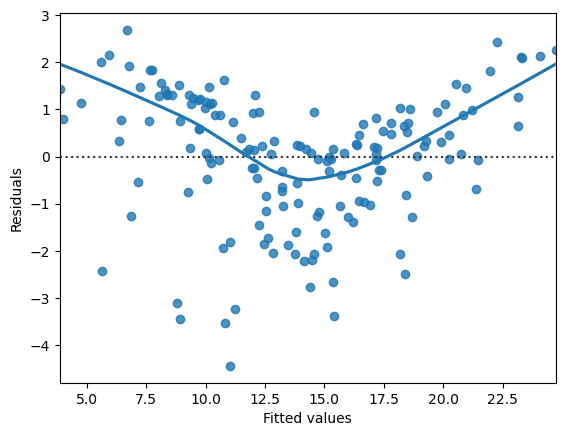

In [139]:
# Assumption 1 : Errors should be random
# checked using Residual v/s Fitted plot
model_fitted_y = lm_model.fittedvalues
sns.residplot(x = model_fitted_y, y = 'sales', data = new_df, lowess = True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# The indicative line should be random and should not follow a wave-like pattern
# if we see pattern then we will re build the model till we met the assumption.

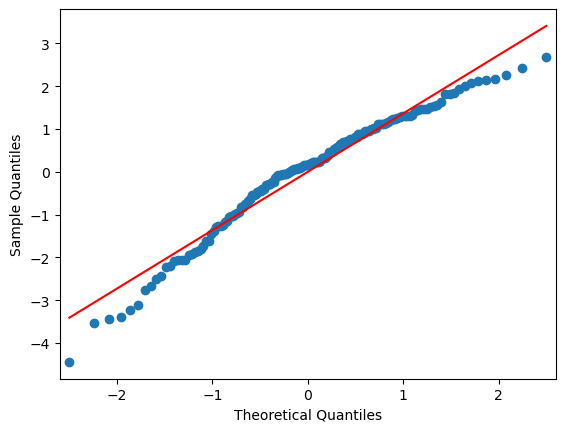

In [140]:
# Assumption 2 : Errors should follow a approximate normal distribution
# checked using Normal QQ plot
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line = 's')
plt.show()

# Error points should follow the red diagonal line to conclude that they follow a approximate normal distribution

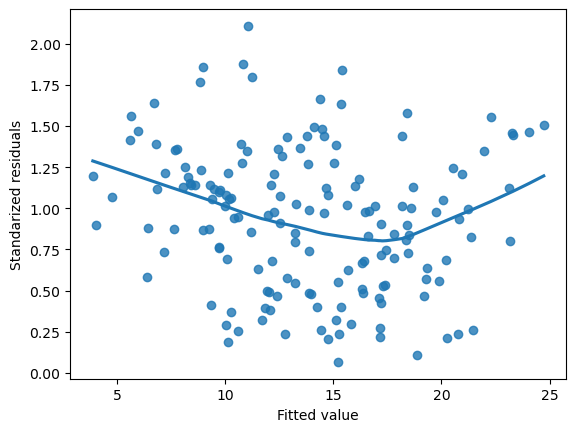

In [142]:
# Assumption 3: Errors should follow a constant variance - Homoskedasticity
# checked using Scale location plot
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(lm_model.resid))
 
sns.regplot(x = lm_model.fittedvalues, y = model_norm_residuals_abs_sqrt, scatter = True, lowess = True)        
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()

# The indicative line should be approximately horizontal and should not show a steep angle with a V-shape curve/structure (Heteroskedasticity) where the errors dont follow constant variance.. 